# Sequential api test

In [21]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import datetime

%load_ext tensorboard

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


2021-08-29 02:19:38.166978: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-08-29 02:19:38.185382: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-08-29 02:19:38.186204: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-08-29 02:19:38.187544: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the app

In [3]:
BATCH_SIZE = 512

## データダウンロード

In [4]:
(X_train, y_train), (X_test, y_test) = \
    tf.keras.datasets.mnist.load_data()

## データ前処理

In [5]:
X_train, X_valid, y_train, y_valid = \
    train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [6]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

In [7]:
(X, y) = next(iter(train_ds.take(1)))

In [8]:
X

<tf.Tensor: shape=(28, 28), dtype=uint8, numpy=
array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 2

In [9]:
y

<tf.Tensor: shape=(), dtype=uint8, numpy=5>

In [10]:
def normalize_mnist(X, y):
    return tf.reshape(X, [28 * 28]) / 255, y

In [11]:
train_ds = train_ds.map(normalize_mnist)

In [12]:
(X, y) = next(iter(train_ds.take(1)))
X

2021-08-29 02:19:40.821219: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


<tf.Tensor: shape=(784,), dtype=float32, numpy=
array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.     

In [13]:
train_ds = train_ds.shuffle(10000).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

In [14]:
valid_ds = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
valid_ds = valid_ds.map(normalize_mnist).shuffle(10000).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_ds = test_ds.map(normalize_mnist).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape=(784,), activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


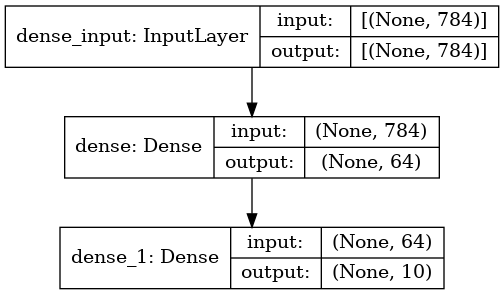

In [16]:
tf.keras.utils.plot_model(model, "model.png", show_shapes=True)

In [17]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [18]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(train_ds, validation_data=valid_ds, epochs=20, callbacks=[tensorboard_callback])

2021-08-29 02:19:41.274995: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-08-29 02:19:41.275051: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-08-29 02:19:41.275105: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2021-08-29 02:19:41.276247: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-08-29 02:19:41.291497: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-08-29 02:19:41.291686: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/20
 3/94 [..............................] - ETA: 8s - loss: 2.2809 - accuracy: 0.1745

2021-08-29 02:19:43.611490: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-08-29 02:19:43.611544: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-08-29 02:19:43.621118: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-08-29 02:19:43.658634: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-08-29 02:19:43.675787: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 0 callback api events and 0 activity events. 
2021-08-29 02:19:43.682606: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-08-29 02:19:43.712029: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20210829-021941/train/plugins/profile/202

94/94 [==============================] - 5s 35ms/step - loss: 0.7902 - accuracy: 0.7893 - val_loss: 0.3582 - val_accuracy: 0.9042
Epoch 2/20
94/94 [==============================] - 3s 30ms/step - loss: 0.3281 - accuracy: 0.9083 - val_loss: 0.2759 - val_accuracy: 0.9234
Epoch 3/20
94/94 [==============================] - 3s 26ms/step - loss: 0.2666 - accuracy: 0.9253 - val_loss: 0.2406 - val_accuracy: 0.9349
Epoch 4/20
94/94 [==============================] - 3s 30ms/step - loss: 0.2328 - accuracy: 0.9347 - val_loss: 0.2172 - val_accuracy: 0.9418
Epoch 5/20
94/94 [==============================] - 3s 32ms/step - loss: 0.2082 - accuracy: 0.9410 - val_loss: 0.1999 - val_accuracy: 0.9462
Epoch 6/20
94/94 [==============================] - 3s 33ms/step - loss: 0.1886 - accuracy: 0.9469 - val_loss: 0.1893 - val_accuracy: 0.9480
Epoch 7/20
94/94 [==============================] - 3s 31ms/step - loss: 0.1725 - accuracy: 0.9514 - val_loss: 0.1759 - val_accuracy: 0.9507
Epoch 8/20
94/94 [======

In [19]:
model.evaluate(test_ds)

20/20 [==============================] - 0s 15ms/step - loss: 0.1114 - accuracy: 0.9671


[0.1113848015666008, 0.9671000242233276]

In [22]:
%tensorboard --logdir logs/fit